## Multiple bars for each category

- First I am brining in some data and then making some columns for salarys for 2019-2021 to give us something to plot
- Then i do the plot


In [28]:
import pandas as pd
df = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/salary.csv?raw=true')

In [29]:
df.head(1)

,Department,Department Name,Division,Gender,Base Salary,2020 Overtime Pay,2020 Longevity Pay,Grade
0,ABS,Alcohol Beverage Services,Wholesale Administration,F,78902.0,199.17,0.0,18


In [30]:
data = df.groupby('Department Name').mean()


In [31]:
import random 
data['salary_2020'] = data['Base Salary'] * [1.1+ (random.random()* 0.1) for i in range(len(data))]
data['salary_2021'] = data['Base Salary'] * [1.2+ (random.random()* 0.1) for i in range(len(data))]

data.rename(columns = {'Base Salary' : 'salary_2019'}, inplace= True)
data = data[['salary_2019', 'salary_2020', 'salary_2021']]

In [32]:
data = data.head(10)
data

,salary_2019,salary_2020,salary_2021
Department Name,,,
Alcohol Beverage Services,56071.320046,64924.567173,69002.926785
Board of Appeals Department,94044.970000,110013.645731,121834.858002
Board of Elections,81829.794483,92520.159840,98448.007853
Community Engagement Cluster,69481.672048,82160.293296,90059.925996
Community Use of Public Facilities,88778.090769,105265.967565,107462.260348
Correction and Rehabilitation,77745.885124,88873.253431,96562.830917
County Attorney's Office,115512.614865,127353.891619,143392.597414
County Council,95375.490000,112945.312499,117161.756398
Department of Environmental Protection,96362.371739,112928.109442,121340.239905


Above is the data I want to plot 

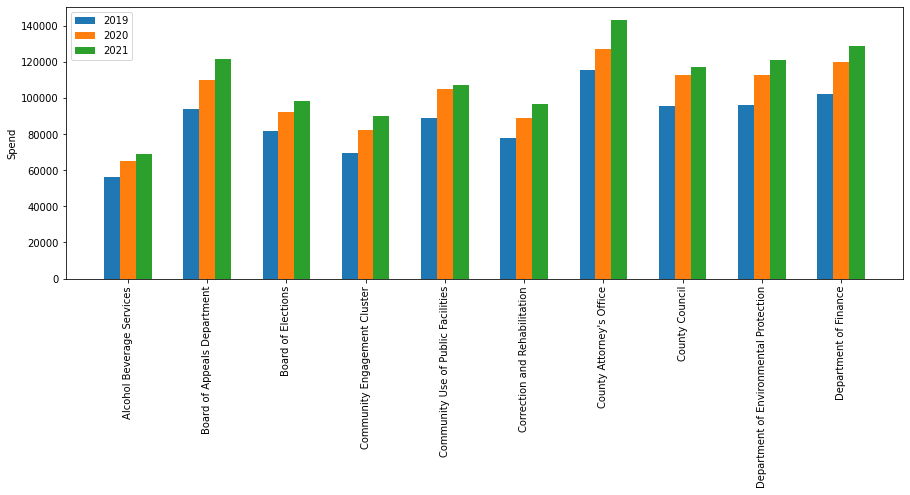

In [33]:
import matplotlib.pyplot as plt

# Data
departments = ['Department 1', 'Department 2', 'Department 3']
spend_2012 = [12000, 15000, 9000]
spend_2013 = [14000, 11000, 8000]
spend_2014 = [13000, 9000, 7000]

# Plotting
x = range(len(data.index.values))
width = 0.2

fig, ax = plt.subplots()

bar1 = ax.bar(x, data.salary_2019, width, label='2019')
bar2 = ax.bar([i + width for i in x], data.salary_2020, width, label='2020')
bar3 = ax.bar([i + 2*width for i in x], data.salary_2021, width, label='2021')

ax.set_ylabel('Spend')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(data.index.values, rotation = 90)
ax.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5)


In [34]:
import seaborn as sns
data = data.reset_index()

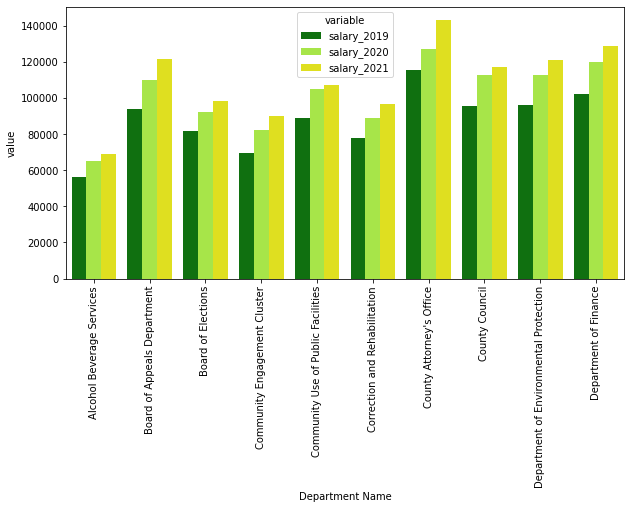

In [48]:

# Data
departments = ['Department 1', 'Department 2', 'Department 3']
spend_2012 = [12000, 15000, 9000]
spend_2013 = [14000, 11000, 8000]
spend_2014 = [13000, 9000, 7000]

# Create a dataframe
df = pd.DataFrame({'Department': departments, '2012': spend_2012, '2013': spend_2013, '2014': spend_2014})


# Melt the dataframe to create long format
df_melted = data.melt(id_vars='Department Name', value_vars=['salary_2019', 'salary_2020', 'salary_2021'])

# Plot
sns.set_palette(['green', 'greenyellow', 'yellow'])
sns.barplot(x='Department Name', y='value', hue='variable', data=df_melted)

ax = plt.gca()
ax.set_xticklabels(data['Department Name'], rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10, 5)


# Show the plot
plt.show()
